# Importing packages

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler 
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Load dataset 

In [185]:
df = pd.read_csv("accident.csv")

# Exploratory data analysis

In [186]:
df.head(5)

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [187]:
df.shape

(200, 6)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [189]:
df.columns

Index(['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used',
       'Survived'],
      dtype='object')

In [190]:
df.describe()

,Age,Speed_of_Impact,Survived
count,200.00000,197.000000,200.00000
mean,43.42500,70.441624,0.50500
std,14.94191,30.125298,0.50123
min,18.00000,20.000000,0.00000
25%,31.00000,43.000000,0.00000
50%,43.50000,71.000000,1.00000
75%,56.00000,95.000000,1.00000
max,69.00000,119.000000,1.00000


## Checking for missing values and handling missing values

In [154]:
df.isnull().sum()

Age                0
Gender             1
Speed_of_Impact    3
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

In [201]:
df.loc[:, 'Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Speed_of_Impact']=df['Speed_of_Impact'].fillna(df['Speed_of_Impact'].median())
df.isnull().sum()

Age                0
Gender             0
Speed_of_Impact    0
Helmet_Used        0
Seatbelt_Used      0
Survived           0
dtype: int64

## Divide the Data into Categorical and numumerical data

In [202]:
catergorical=[var for var in df.columns if df[var].dtype=='O']
numerical=[var for var in df.columns if df[var].dtype!='O']
print(f"Total {len(catergorical)}catergorical data is: {catergorical}")
print(f"Total {len(numerical)} Numerical data is : {numerical}")

Total 3catergorical data is: ['Gender', 'Helmet_Used', 'Seatbelt_Used']
Total 3 Numerical data is : ['Age', 'Speed_of_Impact', 'Survived']


### Exploring Categorical Variables

In [192]:
df['Gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [124]:
df['Gender'].value_counts()

Gender
Female    110
Male       89
Name: count, dtype: int64

In [125]:
df['Gender'].isnull().sum()

1

In [126]:
df['Helmet_Used'].unique()

array(['No', 'Yes'], dtype=object)

In [127]:
df['Helmet_Used'].value_counts()

Helmet_Used
Yes    111
No      89
Name: count, dtype: int64

In [128]:
df['Helmet_Used'].isnull().sum()

0

In [129]:
df['Seatbelt_Used'].unique()

array(['No', 'Yes'], dtype=object)

In [130]:
df['Seatbelt_Used'].value_counts()

Seatbelt_Used
Yes    111
No      89
Name: count, dtype: int64

In [131]:
df['Seatbelt_Used'].isnull().sum()

0

### Exploring Numerical Variables

In [132]:
numerical

['Age', 'Speed_of_Impact', 'Survived']

In [135]:
df['Age'].unique()

array([56, 69, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61,
       47, 55, 50, 29, 42, 66, 44, 59, 45, 33, 64, 68, 54, 24, 26, 35, 21,
       31, 67, 43, 37, 52, 34, 23, 51, 27, 48, 65, 62, 58, 18, 22, 30, 49],
      dtype=int64)

In [136]:
df['Age'].value_counts()

Age
56    9
61    9
41    7
45    7
32    7
31    6
25    6
52    6
18    5
26    5
24    5
68    5
43    5
59    5
42    5
62    5
64    5
19    5
46    4
21    4
50    4
39    4
20    4
44    4
57    4
69    4
53    4
28    4
40    4
54    4
38    4
30    3
58    3
49    3
35    3
47    3
51    2
22    2
29    2
65    2
67    2
60    2
23    2
34    2
66    2
37    2
33    2
48    1
55    1
36    1
27    1
Name: count, dtype: int64

In [137]:
df['Age'].isnull().sum()

0

In [140]:
df['Speed_of_Impact'].unique()

array([ 27.,  46., 117.,  40.,  49., 116.,  47.,  83.,  88.,  80.,  67.,
        38.,  23.,  nan,  68.,  36., 111., 112.,  65.,  25., 118.,  56.,
        43.,  72., 114.,  79.,  82., 104.,  51., 106.,  52.,  86.,  37.,
        44.,  73.,  77.,  66., 105.,  42.,  85.,  21., 109.,  28.,  62.,
        58.,  61.,  45.,  69.,  32.,  26.,  76.,  55.,  64.,  39.,  84.,
        35.,  33.,  95.,  34.,  70.,  81.,  41.,  71.,  89.,  24.,  87.,
       115., 113.,  74.,  59.,  31.,  20.,  53., 108.,  48.,  97., 119.,
        29.,  99., 110., 103.])

In [141]:
df['Speed_of_Impact'].value_counts()

Speed_of_Impact
77.0     7
35.0     6
88.0     6
109.0    5
82.0     5
        ..
39.0     1
64.0     1
55.0     1
26.0     1
103.0    1
Name: count, Length: 80, dtype: int64

In [142]:
df['Speed_of_Impact'].isnull().sum()

3

In [143]:
df['Survived'].unique()

array([1, 0], dtype=int64)

In [144]:
df['Survived'].value_counts()

Survived
1    101
0     99
Name: count, dtype: int64

In [145]:
df['Survived'].isnull().sum()

0

In [149]:
df['Age']

0      56
1      69
2      46
3      32
4      60
       ..
195    69
196    30
197    58
198    20
199    56
Name: Age, Length: 200, dtype: int64

In [159]:
numerical

['Age', 'Speed_of_Impact', 'Survived']

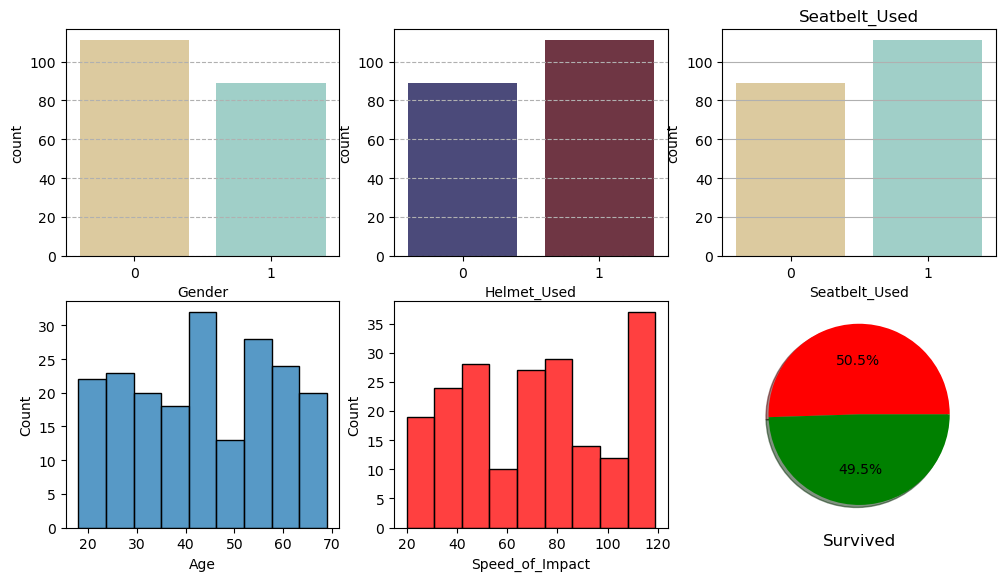

In [312]:
plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
sns.countplot(x=df['Gender'],data=df,palette='BrBG')
plt.grid( linestyle='--',axis='y')
plt.subplot(3,3,2)
sns.countplot(x=df['Helmet_Used'],data=df,palette='icefire')
plt.grid(linestyle='--',axis='y')

plt.subplot(3,3,3)
sns.countplot(x=df['Seatbelt_Used'],data=df,palette='BrBG')
plt.grid(linestyle='-',axis='y')
plt.title('Seatbelt_Used')

plt.subplot(3,3,4)
sns.histplot(df['Age'])
plt.xlabel('Age')

plt.subplot(3,3,5)
sns.histplot(df['Speed_of_Impact'],color='red')
plt.xlabel('Speed_of_Impact')
plt.subplot(3,3,6)
c=df['Survived'].value_counts()
plt.pie(c,colors=['red','green'],autopct='%1.1f%%',shadow=True)
plt.xlabel('Survived', fontsize=12)
plt.show()


## Encoding Data

### Encoding Categorical Data

In [208]:
LR=LabelEncoder()
df['Gender']=LR.fit_transform(df['Gender'])
df['Helmet_Used']=LR.fit_transform(df['Helmet_Used'])
df['Seatbelt_Used']=LR.fit_transform(df['Seatbelt_Used'])

# Declare feature vector and target variable

In [222]:
x = df.drop(columns=['Survived'])  
y = df['Survived']  

# Split data into separate training and test set

In [232]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=0)

In [233]:
x_train.shape,x_test.shape

((140, 5), (60, 5))

In [234]:
x_train

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used
131,54,1,109.0,1,0
96,62,0,41.0,1,0
181,23,1,53.0,1,1
19,41,1,71.0,1,0
153,43,1,95.0,0,0
...,...,...,...,...,...
67,57,0,69.0,1,0
192,50,0,43.0,1,1
117,22,1,118.0,1,0
47,35,0,65.0,1,1


## Feature Scaling

In [235]:
m=MinMaxScaler()
x_train=m.fit_transform(x_train)
x_test=m.transform(x_test)

In [237]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_train.describe()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used
count,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.503501,0.428571,0.528066,0.514286,0.564286
std,0.287890,0.496649,0.308180,0.501590,0.497631
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254902,0.000000,0.242424,0.000000,0.000000
50%,0.509804,0.000000,0.515152,1.000000,1.000000
75%,0.745098,1.000000,0.851010,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Model training

## Train Logistic Regression model and make prediction

In [244]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [245]:
ypred_train=model.predict(x_train)

In [246]:
model.fit(x_test,y_test)
ypred_test=model.predict(x_test)

# Accurasy checking

In [247]:
print("Accuracy:", accuracy_score(y_test, ypred_test))
print("Classification Report:\n", classification_report(y_test, ypred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred_test))

Accuracy: 0.5833333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.41      0.47        27
           1       0.60      0.73      0.66        33

    accuracy                           0.58        60
   macro avg       0.57      0.57      0.56        60
weighted avg       0.58      0.58      0.57        60

Confusion Matrix:
 [[11 16]
 [ 9 24]]


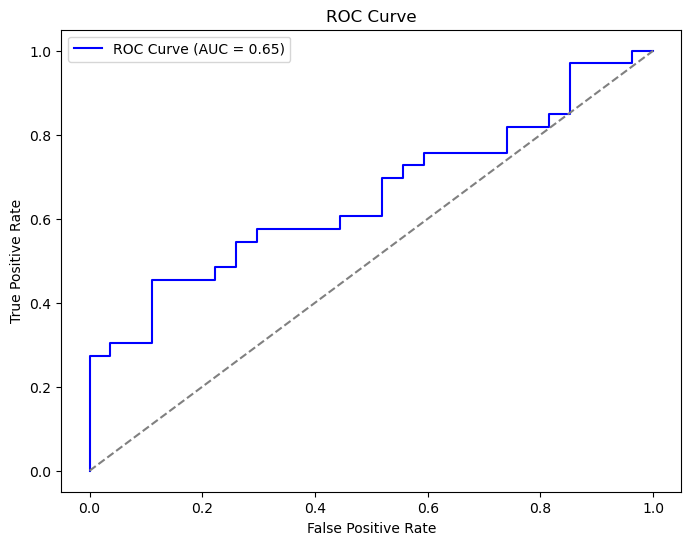

In [265]:
y_pred_proba = model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [257]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores.mean()))

Cross-validation scores:0.55
